In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

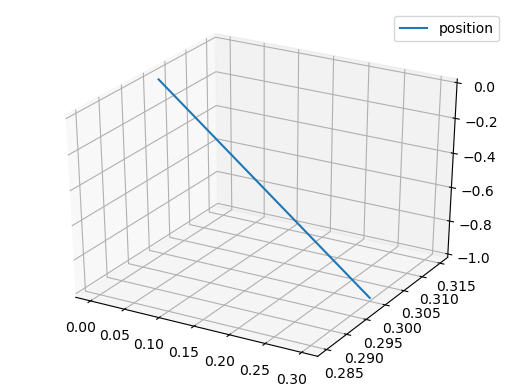

In [5]:
tf = 0.1
ws_i = np.array([0.0, 0.3, 0.0])
ws_f = np.array([0.3, 0.3, -1.0])
a_max = 1
v_max = 0.3
dt = 0.01
length = np.linalg.norm(ws_f-ws_i)
while True:
    D = np.array([[5*tf**2, 4*tf, 3],
                    [20*tf**2, 12*tf, 6],
                    [tf**5, tf**4, tf**3]])
    Da = np.array([[0, 4*tf, 3],
                    [0, 12*tf, 6],
                    [length, tf**4, tf**3]])
    Db = np.array([[5*tf**2, 0, 3],
                    [20*tf**2, 0, 6],
                    [tf**5, length, tf**3]])
    Dc = np.array([[5*tf**2, 4*tf, 0],
                    [20*tf**2, 12*tf, 0],
                    [tf**5, tf**4, length]])

    A = np.linalg.det(Da)/np.linalg.det(D)
    B = np.linalg.det(Db)/np.linalg.det(D)
    C = np.linalg.det(Dc)/np.linalg.det(D)
    t_half = tf/2
    t_quater = tf/4
    if np.abs(5*A*t_half**4 + 4*B*t_half**3 + 3*C*t_half**2)<=v_max and np.abs(20*A*t_quater**3 + 12*B*t_quater**2 + 6*C*t_quater)<=a_max:
        break
    tf = 1.1*tf
trajectory_pos = []
trajectory_velo = []
trajectory_acc = []
for t in np.arange(0,tf+dt,dt):
    lenght_percent = (A*t**5 + B*t**4 + C*t**3)/length
    pos_3d = (ws_f-ws_i)*lenght_percent + ws_i
    wsd_t = 5*A*t**4 + 4*B*t**3 + 3*C*t**2
    velo_3d = (ws_f-ws_i)/length * wsd_t
    wsdd_t = 20*A*t**3 + 12*B*t**2 + 6*C*t
    trajectory_pos.append(pos_3d)
    trajectory_velo.append(wsd_t)
    trajectory_acc.append(wsdd_t)
trajectory_pos = np.array(trajectory_pos)
# print(trajectory_pos[:,0])
ax = plt.figure().add_subplot(projection='3d')
ax.plot(trajectory_pos[:,0],trajectory_pos[:,1],trajectory_pos[:,2],label="position")
# plt.plot(np.arange(0,tf+dt,dt),trajectory_velo,label="velocity")
# plt.plot(np.arange(0,tf+dt,dt),trajectory_acc,label="acceleration")
ax.legend()
plt.show()